In [ ]:
!pip install causalpy==0.0.14

In [2]:
#ライブラリのインポート
from sklearn.linear_model import LinearRegression
import causalpy as cp

#データのロード
df = cp.load_data("sc")

#処置のタイミングの設定(70日時点)
treatment_time = 70

In [3]:
# 合成コントロール法による因果効果の推定
result = cp.skl_experiments.SyntheticControl(
    df,
    treatment_time,
    formula="actual ~ 0 + a + b + c + d + e + f + g", # actualが処置群の個体の売上を表し、変数a～gが対照群の個体を表す。説明変数の最初の0は切片が0であることを表す
    model=cp.skl_models.WeightedProportion(),# 重み付けを実施し、個体a～gを用いて合成対照群を作成
)

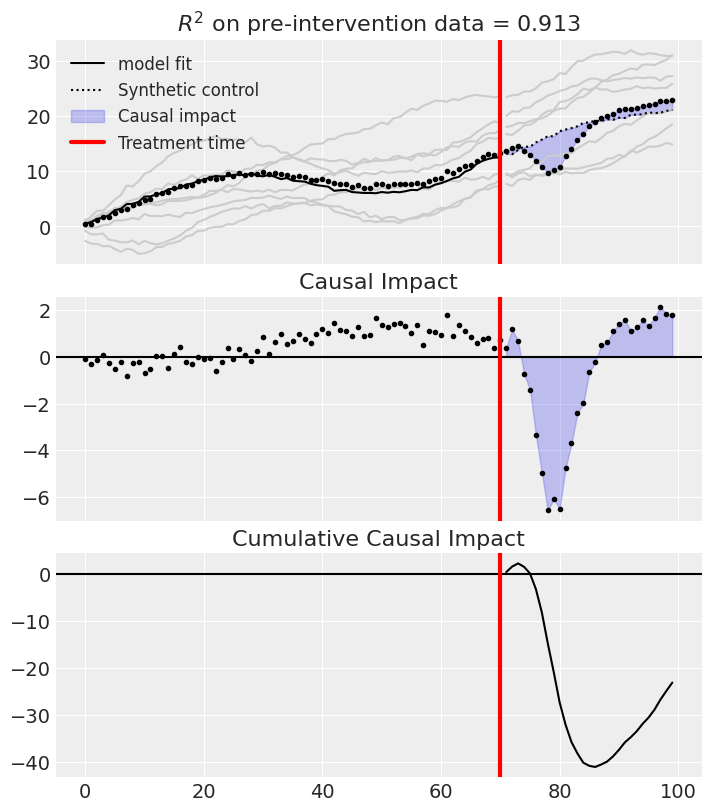

In [4]:
# 結果の可視化
fig, ax = result.plot(plot_predictors=True)

/usr/local/lib/python3.10/dist-packages/causalpy/skl_experiments.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/causalpy/skl_experiments.py:146: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


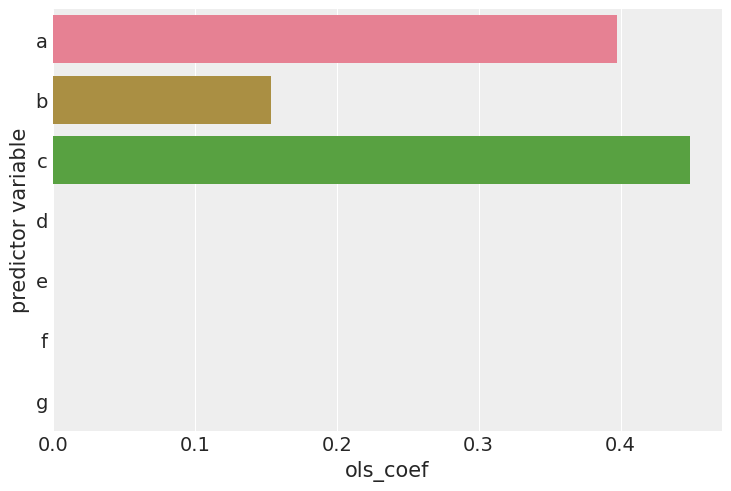

In [5]:
result.plot_coeffs()